# Classification

## 1. Decision Trees :

#### Decision Tree Construction:
- **Objective:** Decision trees recursively split data based on features to make decisions.
- **Splitting Criteria:** Decision trees use criteria like Gini impurity, entropy, or mean squared error to determine the best feature for splitting.
- **Information Gain:** The decision tree algorithm seeks to maximize information gain at each split.



Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They work by recursively splitting the dataset based on the most significant features, leading to a tree-like structure of decisions. Here are some relevant terminologies and explanations, along with coded examples in Python using scikit-learn.










### Relevant Terminologies:

#### 1. Node:
A node in a decision tree represents a decision or a test on a particular feature.

#### 2. Root Node:
The topmost node in the tree, representing the initial decision or test.

#### 3. Leaf Node:
A terminal node that contains the final decision or the predicted outcome.

#### 4. Splitting:
The process of dividing a node into two or more child nodes based on a certain criterion.

#### 5. Feature:
The input variable used for making decisions.

#### 6. Criterion:
The measure used to determine the quality of a split. Common criteria include Gini impurity, entropy, and mean squared error.

#### 7. Decision Rule:
The condition applied to a feature to make a decision. For example, "If feature X is greater than Y, go left; otherwise, go right."

#### 8. Pruning:
The process of removing branches or nodes from a tree to prevent overfitting.

### 1. Gini Impurity:

One common criterion used in decision trees for classification tasks is the Gini impurity. For a given node $t $ with $ N_t $ samples, and $ k $ classes, the Gini impurity $ G(t) $ is calculated as:

$ G(t) = 1 - \sum_{i=1}^{k} p(i|t)^2 $

Here:
- $ p(i|t) $ is the proportion of samples of class $ i $ at node $ t $.

The Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified. It ranges from 0 (pure node) to 0.5 (maximum impurity).

### 2. Information Gain:

The decision tree algorithm aims to find splits that maximize information gain. Information gain is a measure of the effectiveness of a split in reducing uncertainty about the class labels. It is calculated as the difference in impurity before and after the split.

$ \text{Information Gain} = G(\text{parent}) - \sum_{i=1}^{m} \frac{N_i}{N} G(\text{child}_i) $

Here:
- $ G(\text{parent}) $ is the Gini impurity of the parent node.
- $ m $ is the number of child nodes after the split.
- $ N_i $ is the number of samples in the $i$-th child node.
- $ N $ is the total number of samples in the parent node.

### 3. Decision Rule:

The decision tree recursively selects the feature and split point that maximize information gain. The decision rule for a node is based on a feature $ X_j $ and a threshold value $ t $ :

$ \text{if } X_j \leq t \text{, go left; else, go right} $

### 4. Entropy (Alternative Impurity Measure):

An alternative impurity measure is entropy. The entropy $ H(t) $ of a node $ t $ is defined as:

$ H(t) = -\sum_{i=1}^{k} p(i|t) \log_2 p(i|t) $

Entropy measures the average information content needed to classify a sample. Decision trees can be built using either Gini impurity or entropy as the splitting criterion.



In [2]:
'''
Practical Example (using Python and scikit-learn):

This example shows how to train decision tree models with both Gini impurity and entropy as the criterion using scikit-learn.

Understanding the underlying mathematics helps in appreciating how decision trees make decisions and the trade-offs involved in choosing different impurity measures.
'''

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create and train a Decision Tree model with Gini impurity
tree_model_gini = DecisionTreeClassifier(criterion='gini')
tree_model_gini.fit(X, y)

# Create and train a Decision Tree model with entropy
tree_model_entropy = DecisionTreeClassifier(criterion='entropy')
tree_model_entropy.fit(X, y)

# Visualize the decision tree rules for both models
tree_rules_gini = export_text(tree_model_gini, feature_names=iris.feature_names)
tree_rules_entropy = export_text(tree_model_entropy, feature_names=iris.feature_names)

print("Decision Tree Rules (Gini impurity):\n", tree_rules_gini)
print("\nDecision Tree Rules (Entropy):\n", tree_rules_entropy)

Decision Tree Rules (Gini impurity):
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2


Decision Tree Rules (Entropy):
 |--- petal width (cm) <= 0.80
| 

### Understanding Decision Tree Rules:

The output will look like a set of rules that represent the decision-making process of the tree. For example:

```
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2
```

Each rule represents a decision based on a feature and its value, leading to a specific class prediction at the leaf nodes.

In this example:
- If petal width is less than or equal to 0.8, predict class 0.
- If petal width is greater than 0.8 and petal width is less than or equal to 1.75:
  - If petal length is less than or equal to 4.95, predict class 1.
  - If petal length is greater than 4.95, predict class 2.
- If petal width is greater than 1.75:
  - If petal length is less than or equal to 4.85, predict class 2.
  - If petal length is greater than 4.85, predict class 2.

This is a simplified decision tree that captures the patterns in the data for the Iris classification task. In practice, decision trees can become more complex based on the complexity of the dataset.

Remember, while decision trees are interpretable, they are also prone to overfitting. Techniques like pruning and limiting the maximum depth of the tree are often used to mitigate this.

In [6]:
# Decision Tree Example:

# Let's create a simple decision tree using scikit-learn for a classification task:

'''
In this example, we use the Iris dataset, and the decision tree is trained to classify iris flowers into three classes
(setosa, versicolor, and virginica). The `export_text` function is used to print the rules of the decision tree.
'''

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Display the predictions
print("Predictions:", predictions)

# Display the actual labels
print("Actual labels:", y_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)

# Display the decision tree rules
tree_rules = export_text(classifier, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n", tree_rules)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Accuracy: 1.0

Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <

Ensemble learning is a machine learning technique that involves combining multiple models to create a stronger and more robust predictive model. The fundamental idea behind ensemble learning is that by combining the predictions of multiple weak learners (individual models), the overall model's performance can be improved, often outperforming the individual models. Ensemble methods are widely used for both classification and regression tasks. There are various ensemble techniques, with the most common ones being Bagging, Boosting, and Stacking.

### Key Concepts of Ensemble Learning:

#### 1. **Weak Learners:**
   - **Definition:** Weak learners are models that perform slightly better than random chance.
   - **Example:** Decision trees with limited depth, linear models, or models with low complexity.

#### 2. **Diversity:**
   - **Importance:** Ensemble methods benefit from diverse weak learners, i.e., models that make errors on different subsets of the data.
   - **Example:** Using different algorithms or tweaking hyperparameters to introduce diversity.

#### 3. **Aggregation:**
   - **Combining Predictions:** Ensemble methods aggregate the predictions of weak learners to make a final prediction.
   - **Methods:** Common aggregation techniques include averaging (for regression) and voting (for classification).

### Types of Ensemble Learning:

#### 1. **Bagging (Bootstrap Aggregating):**
   - **Idea:** Train multiple instances of the same model on different bootstrap samples (random subsets with replacement) of the training data.
   - **Example:** Random Forest is a popular bagging ensemble method that uses decision trees.

#### 2. **Boosting:**
   - **Idea:** Train a sequence of weak learners, where each model corrects the errors of the previous one.
   - **Example:** AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), XGBoost, and LightGBM are boosting algorithms.

#### 3. **Stacking:**
   - **Idea:** Train multiple diverse models and use another model (meta-learner) to combine their predictions.
   - **Example:** Train various models like decision trees, support vector machines, and neural networks, and then use a meta-learner (e.g., linear regression) to combine their outputs.

#### 4. **Random Forest:**
   - **Composition:** A Random Forest is an ensemble of decision trees, where each tree is trained on a random subset of features and a random subset of the training data.
   - **Benefits:** Reduces overfitting and improves generalization.

### Benefits of Ensemble Learning:

#### 1. **Improved Accuracy:**
   - Ensemble methods often achieve higher accuracy compared to individual models, especially when dealing with complex datasets.

#### 2. **Robustness:**
   - Ensemble models are more robust to outliers and noisy data, as the errors of individual models can be balanced out.

#### 3. **Generalization:**
   - Ensemble methods tend to generalize well to new, unseen data, reducing the risk of overfitting.

#### 4. **Versatility:**
   - Ensemble learning can be applied to a wide range of machine learning algorithms, making it a versatile approach.




This example demonstrates the use of a Random Forest, a popular ensemble method, on the Iris dataset using scikit-learn. The Random Forest combines multiple decision trees to improve predictive performance.

## **Random Forest:**

Random Forest is an ensemble learning algorithm that can be used for both classification and regression tasks. It was introduced by Leo Breiman and Adele Cutler. The key idea behind the Random Forest algorithm is to build a multitude of decision trees during training and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Key Components of Random Forest:**

1. **Decision Trees:**
   Random Forest is essentially a collection of decision trees. Decision trees are simple models that make decisions based on input features. Each tree in the Random Forest is trained on a subset of the data and a random subset of features.

2. **Bootstrapping:**
   During the training process, Random Forest uses a technique called bootstrapping. This involves randomly sampling the dataset with replacement to create multiple subsets, each of which is used to train a different decision tree.

3. **Random Feature Selection:**
   When training each tree, only a random subset of features is considered at each split point. This helps to decorrelate the trees, making the ensemble more robust and less prone to overfitting.

4. **Voting or Averaging:**
   For classification tasks, the final prediction is often determined by a majority vote among the individual trees. For regression tasks, the final prediction is the average prediction of all the trees.

**Advantages of Random Forest:**

1. **High Accuracy:**
   Random Forest often provides high accuracy compared to individual decision trees, especially when the dataset is complex.

2. **Robust to Overfitting:**
   The random feature selection and bootstrapping help in creating diverse trees, reducing the risk of overfitting.

3. **Handle Missing Values:**
   Random Forest can handle missing values in the dataset and maintain good predictive performance.

4. **Feature Importance:**
   Random Forest provides a feature importance score, indicating which features are more influential in making predictions.

5. **Parallelization:**
   Training and prediction with Random Forest can be easily parallelized, making it computationally efficient.

**Disadvantages of Random Forest:**

1. **Less Interpretable:**
   The ensemble nature of Random Forest makes it less interpretable compared to individual decision trees.

2. **Computational Complexity:**
   Training multiple decision trees can be computationally expensive, especially for large datasets.

Overall, Random Forest is a powerful and versatile algorithm that is widely used in various machine learning applications due to its robustness and high performance.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## 3. Support Vector Machines

**Support Vector Machines (SVM):**

- **Introduction:**
  - A powerful supervised learning algorithm used for both classification and regression tasks.
  - Particularly effective in high-dimensional spaces.

- **Objective:**
  - To find the hyperplane that best separates data into different classes.
  - Maximizes the margin between classes, i.e., the distance between the hyperplane and the nearest data points (support vectors).

- **Linear SVMs:**
  - **Aim:** To find a linear hyperplane that maximally separates classes.
  - **Approach:**
    - Utilize a linear kernel function to map data into a higher-dimensional space.
    - Seek the optimal hyperplane in this transformed space.
  - **Advantages:**
    - Effective for linearly separable datasets.
    - Computational efficiency in high-dimensional spaces.

- **Nonlinear SVMs:**
  - **Purpose:** Handle datasets that are not linearly separable.
  - **Approach:**
    - Employ the kernel trick to implicitly map data into a higher-dimensional space.
    - Allows finding a hyperplane in this transformed space, even when the original data is not linearly separable.
  - **Kernel Trick:**
    - A mathematical method that avoids explicitly computing the coordinates of data points in the higher-dimensional space.
    - Popular kernel functions include polynomial, radial basis function (RBF), and sigmoid kernels.
  - **Advantages:**
    - Flexibility to capture complex relationships between features and labels.
    - Can handle both linear and nonlinear relationships effectively.

- **Applications:**
  - Widely used in various fields, including image classification, text categorization, and bioinformatics.
  - Particularly valuable when dealing with high-dimensional data or complex decision boundaries.

- **Considerations:**
  - Choice of the kernel function is crucial and depends on the nature of the data.
  - SVMs are sensitive to parameter tuning, especially the regularization parameter (C) and kernel parameters.

- **Conclusion:**
  - SVMs offer a robust and versatile approach for solving classification and regression problems, capable of handling both linear and nonlinear relationships in data. The kernel trick extends their applicability to a wide range of real-world scenarios.

### **Linear SVM:**

1. **Decision Function:**
   - Given a feature vector $ \mathbf{x} $ and a weight vector $ \mathbf{w} $, the decision function for a linear SVM is $ f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $, where $ b $ is the bias term.

3. **Margin:**
   - The margin between the hyperplane and the support vectors is $ \frac{1}{||\mathbf{w}||} $. The SVM aims to maximize this margin.

4. **Loss Function:**
   - The hinge loss is commonly used in SVMs:
    $ \text{Hinge Loss} = \max(0, 1 - y \cdot f(\mathbf{x})) $
     where $ y $ is the true class label (+1 or -1), and $ f(\mathbf{x}) $ is the decision function.

### **Nonlinear SVM (Kernel Trick):**

1. **Kernel Function:**
   - Introduce a kernel function $ K(\mathbf{x}_i, \mathbf{x}_j) $ to implicitly map the input data into a higher-dimensional space.

2. **Decision Function with Kernel:**
   - The decision function with the kernel becomes $ f(\mathbf{x}) = \sum_{i=1}^{N} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b $, where $ \alpha_i $ are the Lagrange multipliers.

3. **Optimization Objective with Kernel:**
   - The optimization problem includes the kernel term:
     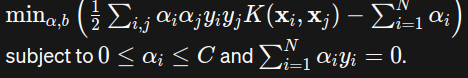

4. **Kernel Functions:**
   - Common kernel functions include:
     - Linear Kernel: $ K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j $
     - Polynomial Kernel: $ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d $
     - Radial Basis Function (RBF) Kernel: $ K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{||\mathbf{x}_i - \mathbf{x}_j||^2}{2\sigma^2}\right) $

5. **Prediction:**
   - Classify a new data point $ \mathbf{x} $ based on the sign of $ f(\mathbf{x}) $.

In both cases, the optimization problems involve finding the optimal parameters that minimize the loss function while maintaining a suitable margin and controlling overfitting through regularization. The mathematics includes calculus, linear algebra, and optimization techniques like quadratic programming. The choice of the kernel function in nonlinear SVMs is crucial and depends on the data distribution.

In [13]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a non-linear SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
predictions = svm_classifier.predict(X_test)

# Print the results
print('Predictions: ', predictions)
print('\nActual Labes: ' , y_test)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Predictions:  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 9 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]

Actual Labes:  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7

## 4. Gradient Boosting Algorithms


**1. What is Gradient Boosting?**
   - Gradient Boosting is a machine learning technique used for both classification and regression tasks.
   - It builds a predictive model in a step-by-step manner, where each new model corrects the errors of the previous one.

**2. How does it work?**
   - Imagine you're trying to solve a problem, and initially, you make some predictions. These predictions might have errors.
   - Gradient Boosting starts by building a simple model (usually a decision tree) that tries to correct those errors.

**3. Learning from Mistakes:**
   - The term "Gradient" in Gradient Boosting refers to the fact that the algorithm pays more attention to the mistakes (residual errors) made by the previous model.
   - It calculates the gradient (slope) of the errors and adjusts the next model to reduce those errors.

**4. Combining Weak Models:**
   - Each new model added focuses on the mistakes of the combined ensemble of models before it.
   - Weak models (simple ones) are usually employed, and many of them are combined to create a strong predictive model.

**5. Iterative Process:**
   - This process is repeated iteratively, with each new model improving upon the errors of the combined ensemble.
   - The final prediction is made by combining the predictions of all the models.

**6. Regularization:**
   - To prevent overfitting (fitting the training data too closely and not generalizing well to new data), a technique called regularization is often applied.

**7. Advantages:**
   - Gradient Boosting is powerful and often yields highly accurate models.
   - It can handle complex relationships in data.

**8. Disadvantages:**
   - It can be computationally expensive and might require tuning of parameters.
   - Prone to overfitting if not properly regularized.

**In a nutshell:**
Gradient Boosting is like a team of players correcting each other's mistakes in a game. Each new player focuses on fixing the errors made by the team so far, gradually improving the overall performance. In machine learning terms, it's an ensemble method that combines weak models to create a strong predictive model by learning from previous mistakes.

### Explanation in mathematical aspect

**1. Objective Function:**
   - In Gradient Boosting, the goal is to minimize an objective function, often referred to as the loss function or cost function.
   - For regression problems, a common loss function is the Mean Squared Error (MSE), while for classification problems, it can be the Cross-Entropy Loss.

**2. Basic Idea:**
   - Suppose we have a dataset with input-output pairs $(x_i, y_i)$ where $x_i$ is the input and $y_i$ is the corresponding true output.
   - The objective is to find a model $F(x)$ that predicts $y$ as accurately as possible.

**3. The Ensemble Model:**
   - The initial prediction is usually a simple model, say $F_0(x)$, which might not be accurate.
   - Subsequent models are added to correct the errors. Each new model $F_m(x)$ is trained to predict the residuals (errors) of the combined model $\hat{y}_{m-1}(x)$.

**4. Loss Function for Iterative Model:**
   - Let's denote the current combined model as $\hat{y}_{m-1}(x)$ and the residuals as $r_{m-1}(x) = y - \hat{y}_{m-1}(x)$.
   - The loss function for the $m$-th model is computed using the residuals: $L_m = \text{Loss}(r_{m-1}(x), F_m(x))$.

**5. Update Rule:**
   - The new model is then trained to minimize this loss. The update rule is often derived using the gradient of the loss function with respect to the predicted values.
   - For example, in regression problems with Mean Squared Error loss, the update rule for the $m$-th model might be $F_m(x) = F_{m-1}(x) + \eta \frac{\partial L_m}{\partial \hat{y}_{m-1}(x)}$, where $\eta$ is the learning rate.

**6. Learning Rate:**
   - The learning rate $\eta$ controls how much we adjust our model in each iteration. It's a hyperparameter that needs to be tuned.

**7. Regularization:**
   - Regularization terms are often added to the loss function to prevent overfitting. These terms penalize complex models.

**8. Final Prediction:**
   - The final prediction is the sum of all individual predictions from each model: $\hat{y}_{\text{final}}(x) = F_0(x) + \eta F_1(x) + \eta F_2(x) + \ldots + \eta F_m(x)$.

**In a nutshell:**
Gradient Boosting involves iteratively adding models to correct the errors of the combined ensemble. The update rules are derived from the gradient of the loss function, and the final prediction is a weighted sum of all individual model predictions. Regularization is used to control model complexity, and the learning rate determines the step size in each iteration.

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Step 1: Load and Prepare Data (using Iris dataset)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Set Parameters
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': 3,                # Number of classes in the target variable
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'eval_metric': 'mlogloss'
}

# Step 3: Initialize and Train the Model
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate Accuracy and Display Results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:')
print(classification_rep)
print('\nConfusion Matrix:')
print(confusion_mat)

# Additional: Display Predictions and Labels
results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})
print('\nPredictions and Labels:')
print(results)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Predictions and Labels:
     True Labels  Predicted Labels
73             1                 1
18             0                 0
118            2                 2
78             1                 1
76             1                 1
31             0                 0
64             1                 1
141            2                 2
68             1                 1
82             1                 1
110            2                 2
12             0                 0
36             0                 0
9        

## 5. XGBoost Algorithm

XGBoost, short for eXtreme Gradient Boosting, is a powerful machine learning algorithm that belongs to the family of gradient boosting methods. It was developed by Tianqi Chen and is widely used for classification and regression tasks. XGBoost has gained popularity and has become a go-to algorithm in various data science competitions and real-world applications due to its high performance and flexibility.

Here's an explanation of the key components and features of XGBoost:

1. **Gradient Boosting:**
   - XGBoost is based on the gradient boosting framework, which is an ensemble learning technique where weak learners (usually decision trees) are trained sequentially, with each new tree trying to correct the errors of the previous ones.
   - The term "gradient" in XGBoost refers to the optimization process where the algorithm minimizes a loss function by moving in the negative direction of the gradient (partial derivative) of the loss.

2. **Regularization:**
   - XGBoost incorporates regularization techniques to control overfitting, making the model more robust and generalizable.
   - L1 (Lasso) and L2 (Ridge) regularization terms are added to the objective function, controlling the complexity of the individual trees.

3. **Tree Pruning:**
   - XGBoost grows trees depth-wise and applies pruning to reduce overfitting. It prunes branches of the tree that do not contribute significantly to the reduction in the loss function.

4. **Parallelization:**
   - XGBoost is designed to be computationally efficient. It supports parallel and distributed computing, making it faster than many other gradient boosting implementations.

5. **Handling Missing Values:**
   - XGBoost has a built-in mechanism to handle missing values in the dataset. It decides the direction in which missing values should go during the tree construction, treating them as just another value.

6. **Cross-validation:**
   - XGBoost supports k-fold cross-validation, allowing robust model evaluation by splitting the data into multiple subsets and training the model on different combinations of them.

7. **Feature Importance:**
   - XGBoost provides a feature importance score, which helps in understanding the significance of each feature in predicting the target variable. This can be useful for feature selection and interpretation.

8. **Flexibility:**
   - XGBoost can be used for both regression and classification tasks. It supports a variety of loss functions and allows customization of the learning task.

**Why XGBoost is useful over other classifiers:**

1. **Performance:**
   - XGBoost often outperforms other machine learning algorithms in terms of accuracy and predictive power. It has been successful in winning numerous Kaggle competitions and is widely used in data science competitions.

2. **Speed and Efficiency:**
   - XGBoost is designed for efficiency and speed. Its implementation is highly optimized, making it faster than many other gradient boosting implementations.

3. **Regularization:**
   - The inclusion of L1 and L2 regularization terms helps control overfitting, making XGBoost more robust and less prone to memorizing noise in the training data.

4. **Handling Missing Values:**
   - XGBoost's ability to handle missing values internally is a significant advantage, eliminating the need for pre-processing steps to impute missing data.

5. **Flexibility:**
   - XGBoost is versatile and can be applied to various types of data and tasks. Its flexibility in handling different loss functions and problem types contributes to its wide usage.

6. **Feature Importance:**
   - The feature importance scores provided by XGBoost are valuable for understanding the impact of each feature on the model's predictions.

In summary, XGBoost's combination of efficient implementation, regularization techniques, and flexibility makes it a popular choice for a wide range of machine learning tasks, often leading to superior performance compared to other classifiers.

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for better visualization (optional)
columns = [f"feature_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xg_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Train the model
xg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_model.predict(X_test)

# Print the predicted labels and original labels
print("Predicted labels:", y_pred)
print("Original labels:", y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and other metrics
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Display the parameters used in the XGBoost model
print("\nXGBoost Model Parameters:")
print(xg_model.get_params())


Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Original labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


XGBoost Model Parameters:
{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_ty

## Params available for Gradient boost and XGBoost

### Gradient Boosting (Scikit-Learn)

#### GradientBoostingRegressor and GradientBoostingClassifier

1. `n_estimators`: Number of boosting stages to be run.
   - Example options: integer (default=100)

2. `learning_rate`: Shrinkage parameter to control the contribution of each tree.
   - Example options: float (default=0.1)

3. `max_depth`: Maximum depth of the individual trees.
   - Example options: integer (default=3)

4. `min_samples_split`: Minimum number of samples required to split an internal node.
   - Example options: integer or float (default=2)

5. `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - Example options: integer or float (default=1)

6. `subsample`: Fraction of samples used for fitting the trees.
   - Example options: float (default=1.0)

7. `loss`: Loss function to be optimized.
   - Example options: 'ls' (least squares regression), 'lad' (least absolute deviation), 'huber', etc.

### XGBoost

XGBoost has an extensive list of parameters. Here are some of them:

1. `learning_rate` (or `eta`): Step size shrinkage to prevent overfitting.
   - Example options: float (default=0.3)

2. `n_estimators`: Number of boosting rounds (trees) to be run.
   - Example options: integer (default=100)

3. `max_depth`: Maximum depth of a tree.
   - Example options: integer (default=6)

4. `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
   - Example options: integer (default=1)

5. `subsample`: Fraction of samples used for fitting the trees.
   - Example options: float (default=1.0)

6. `colsample_bytree`: Fraction of features used for fitting the trees.
   - Example options: float (default=1.0)

7. `reg_alpha` (or `alpha`): L1 regularization term on weights.
   - Example options: float (default=0)

8. `reg_lambda` (or `lambda`): L2 regularization term on weights.
   - Example options: float (default=1)

9. `gamma`: Minimum loss reduction required to make a further partition on a leaf node.
   - Example options: float (default=0)

10. `objective`: Specifies the learning task and corresponding objective function.
    - Example options: 'reg:squarederror' (regression), 'binary:logistic' (binary classification), 'multi:softmax' (multiclass classification), etc.

These are just a subset of the available parameters. The specific options and their default values may depend on the version of the libraries you are using. Always refer to the official documentation for the most accurate and up-to-date information.